In [1]:
import pandas as pd
import numpy as np
from pandas import read_excel
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from calendar import day_abbr, month_abbr, mdays
import datetime
#from datetime import datetime
plt.style.use('fivethirtyeight') # For plots
import os

#Author: Vatsala

#### Image File Path and Plot Data Path

In [2]:
plot_file_path="../plotImages/"
plot_data_path="../plotData/"

##### Specify Plot ID

In [3]:
plotId = "1"

#### Create directory for particular plot

In [4]:
# define the name of the directory to be created for the outputs 

#path = "./VisualisationOutputs/Plot"+str(plotId)

#try:
#    if not os.path.exists(path):     
#         os.mkdir(path)
#except OSError:
#    print ("Creation of the directory %s failed" % path)
#else:
#    print ("Successfully created the directory %s " % path)


# define the name of the directory to be created for the png outputs

path_image = "../plotImages/Plot"+str(plotId)+"/"

try:
    if not os.path.exists(path_image):     
         os.mkdir(path_image)
except OSError:
    print ("Creation of the directory %s failed" % path_image)
else:
    print ("Successfully created the directory %s " % path_image)

Successfully created the directory ../plotImages/Plot1/ 


### Read Plot Data

In [5]:
#****** Running Forecast for Plot 1 *******  Note: Data has been QC-ed

#read Plot 1 data
data = read_excel('../plotData/plotData_'+plotId+'.xlsx', sheet_name='Sheet1', index_col=13, parse_dates=[13])    

In [6]:
print(data.head(10))
data.dtypes

                     QC  Plot_ID  DailyRep treatment       Date   pv      ghg  \
DateTime                                                                        
2019-03-26 17:26:00   0        1         4        F0 2019-03-26  ***  N2O_dry   
2019-03-26 21:49:00   0        1         5        F0 2019-03-26  ***  N2O_dry   
2019-03-27 06:28:00   0        1         1        F0 2019-03-27  ***  N2O_dry   
2019-03-28 20:34:00   0        1         2        F0 2019-03-28    *  N2O_dry   
2019-03-30 02:43:00   0        1         0        F0 2019-03-30  ***  N2O_dry   
2019-03-30 15:27:00   0        1         2        F0 2019-03-30  ***  N2O_dry   
2019-03-30 19:51:00   0        1         3        F0 2019-03-30   **  N2O_dry   
2019-03-31 00:17:00   0        1         0        F0 2019-03-31  ***  N2O_dry   
2019-03-31 04:43:00   0        1         1        F0 2019-03-31  ***  N2O_dry   
2019-03-31 13:32:00   0        1         3        F0 2019-03-31  ***  N2O_dry   

                    unit   

QC                     int64
Plot_ID                int64
DailyRep               int64
treatment             object
Date          datetime64[ns]
pv                    object
ghg                   object
unit                  object
flux                 float64
r2                   float64
nrmse                float64
podpu                float64
epoch_time            object
dtype: object

#### Extract Flux and ghg fields from the dataset

In [7]:
#This dataframe will be used for running in the Prophet model
#Extract only datetime and flux from the series
dataframe = DataFrame()
#dataframe['DateTime'] = data['DateTime']
dataframe['Flux']     = data['flux']
dataframe['ghg']      = data['ghg']
print(dataframe.tail(10))

                          Flux      ghg
DateTime                               
2019-06-27 22:38:00   768.2786  CO2_dry
2019-06-28 02:56:00   550.3863  CO2_dry
2019-06-28 15:51:00   351.4631  CO2_dry
2019-06-28 20:09:00   867.6166  CO2_dry
2019-06-29 00:27:00  1160.3080  CO2_dry
2019-06-29 04:46:00   930.5471  CO2_dry
2019-06-29 13:22:00   412.6364  CO2_dry
2019-06-29 17:41:00   540.0715  CO2_dry
2019-06-29 21:59:00   953.3316  CO2_dry
2019-06-30 02:17:00   684.4827  CO2_dry


### Feature Engineering

In [8]:
#create some time series features to see how the trends are impacted by day of week, hour, time of year, etc.
def create_features(df, label=None):
    #convert the datetime object to string - for plotting purposes

    '''Create time series features from date time index'''
    df = df.copy()
    df['date']        = df.index
    df['dateS']       = df['date'].apply(lambda x: x.strftime("%d/%m/%Y %(%H:%M)"))  #used for plotting purposes
    df['hour']        = df['date'].dt.hour
    df['dayofmonth']  = df['date'].dt.day
    df['weekdayname'] = df['date'].dt.weekday_name
    df['month']       = df['date'].dt.month
    df['year']        = df['date'].dt.year
    df['weekofyear']  = df['date'].dt.weekofyear
    
   # if df['ghg'] != None:
    #    df['ghg']         = df['ghg']
    X = df[['date', 'dateS', 'year', 'month', 'dayofmonth', 'weekdayname', 'weekofyear', 'hour', 'ghg']]  #features should be a matrix
    #else:
    #     X = df[['date', 'year', 'month', 'dayofmonth', 'weekdayname', 'weekofyear', 'hour']]  #features should be a matrix
       
    if label:
        y = df[label]   #target
        return X,y
    return X

In [9]:
X, y = create_features(dataframe, 'Flux')    #the target is the flux in this case; the features = X (as shown above)
features_target = pd.concat([X, y], axis=1)  #concatenate the features and the target
features_target.to_csv('out.csv', index=True)
features_target

,date,dateS,year,month,dayofmonth,weekdayname,weekofyear,hour,ghg,Flux
DateTime,,,,,,,,,,
2019-03-26 17:26:00,2019-03-26 17:26:00,26/03/2019 (17:26),2019,3,26,Tuesday,13,17,N2O_dry,-144.0262
2019-03-26 21:49:00,2019-03-26 21:49:00,26/03/2019 (21:49),2019,3,26,Tuesday,13,21,N2O_dry,-102.3469
2019-03-27 06:28:00,2019-03-27 06:28:00,27/03/2019 (06:28),2019,3,27,Wednesday,13,6,N2O_dry,-93.0909
2019-03-28 20:34:00,2019-03-28 20:34:00,28/03/2019 (20:34),2019,3,28,Thursday,13,20,N2O_dry,63.8219
2019-03-30 02:43:00,2019-03-30 02:43:00,30/03/2019 (02:43),2019,3,30,Saturday,13,2,N2O_dry,-157.9453
...,...,...,...,...,...,...,...,...,...,...
2019-06-29 04:46:00,2019-06-29 04:46:00,29/06/2019 (04:46),2019,6,29,Saturday,26,4,CO2_dry,930.5471
2019-06-29 13:22:00,2019-06-29 13:22:00,29/06/2019 (13:22),2019,6,29,Saturday,26,13,CO2_dry,412.6364
2019-06-29 17:41:00,2019-06-29 17:41:00,29/06/2019 (17:41),2019,6,29,Saturday,26,17,CO2_dry,540.0715


### Plot the features to see trends in the Plot

../plotImages/Plot1/gasflux_Plot1.png


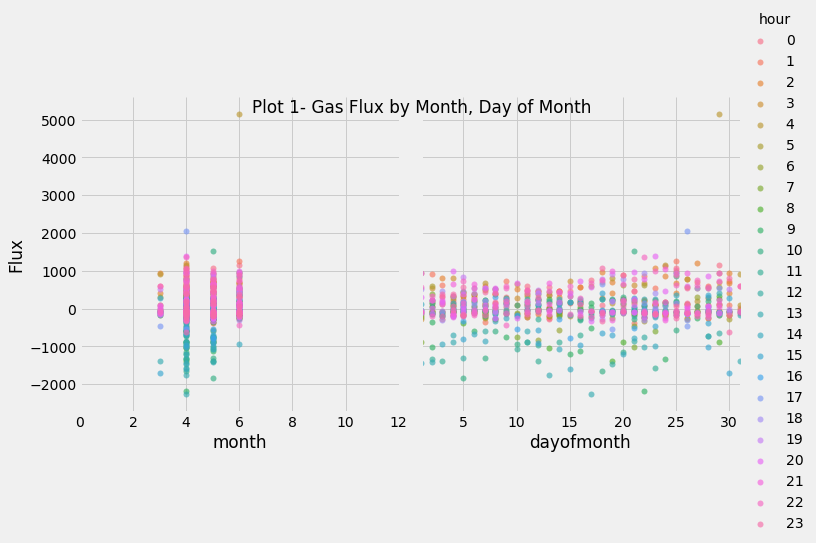

<Figure size 1440x1440 with 0 Axes>

In [10]:
#Plotting the features to see trends   

#to see seasonal properties
#dropna ==> drop missing values
#hue    ==> variable to map data in colour
#vars   ==> variables in data to use; otherwise use every other column
#plot_kws are passed to the bivariate plotting function

#sns_plot = sns.pairplot(features_target.dropna(), hue='hour', x_vars=['hour', 'dayofmonth', 'month', 'year', 'weekofyear'], 
#             y_vars = 'Flux', plot_kws={'alpha':0.75, 'linewidth':0}, height=3.5)

sns_plot = sns.pairplot(features_target.dropna(), hue='hour', x_vars=['month', 'dayofmonth'], 
             y_vars = 'Flux', plot_kws={'alpha':0.65, 'linewidth':0}, height=5)


plt.suptitle('Plot '+plotId+'- Gas Flux by Month, Day of Month', fontdict={'verticalalignment': 'top',  'horizontalalignment': 'right'})
plt.figure(figsize=(20,20))

# Get hold of the `Axes` objects

#For hour
sns_plot.axes[0][0].set_xlim(0, 23)
sns_plot.axes[0][0].set_ylim(None, None)

#For month
sns_plot.axes[0][0].set_xlim(0, 12)
sns_plot.axes[0][0].set_ylim(None, None)

#For days of month
sns_plot.axes[0][1].set_xlim(1, 31)
sns_plot.axes[0][1].set_ylim(None, None)

#Save boxplot as a file
#output file name
output_file_name = "gasflux_Plot1.png" 
plot_file_name   = path_image + output_file_name
# save as png
sns_plot.savefig(plot_file_name, dpi=50, bbox_inches='tight')

print(plot_file_name)
plt.show()

### Plot to see range of gas flux for the Plot 

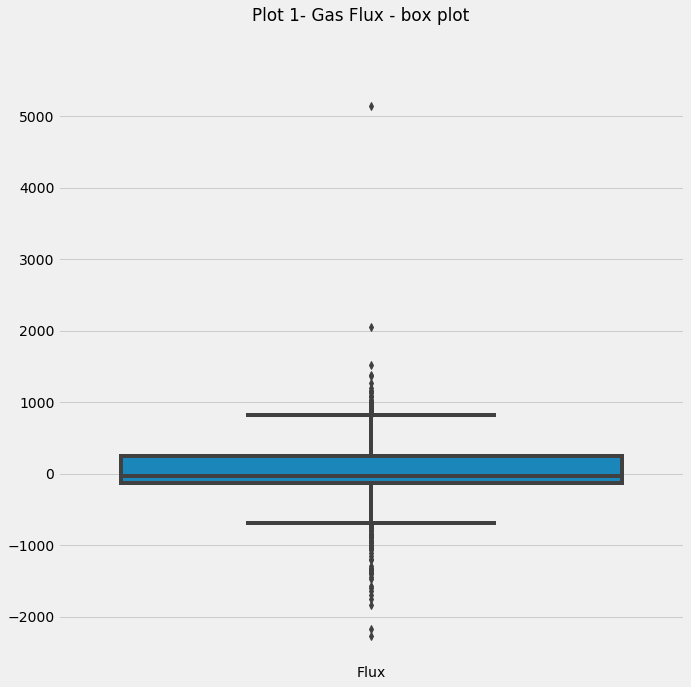

In [11]:
# Boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(data=dataframe)
plt.suptitle('Plot '+plotId+'- Gas Flux - box plot')

#Save boxplot as a file
#output file name
output_file_name = "gasflux_Plot"+plotId+"_boxplot.png" 
plot_file_name = path_image + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')


### Plot to see distribution of gas flux across the day of month feature

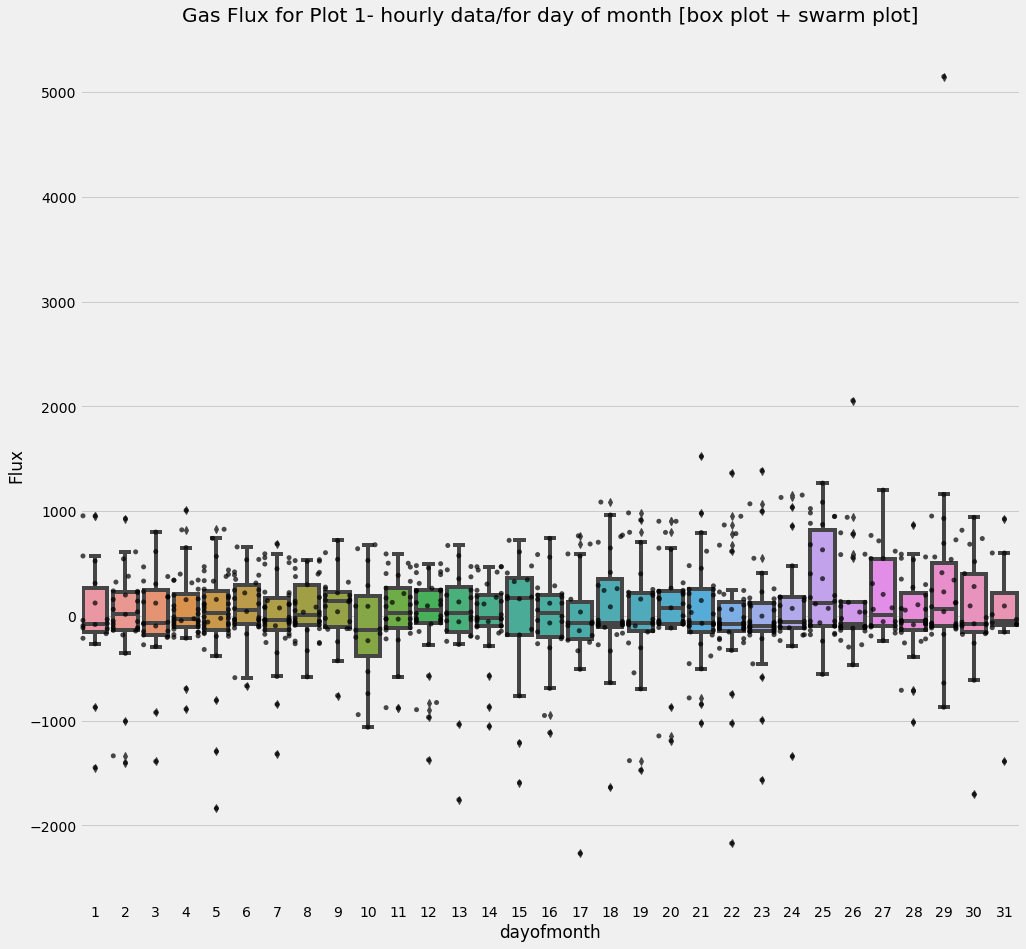

In [12]:
# Create plot - layer 2 plots together  - BoX + SWARm plots 
g = sns.boxplot(x='dayofmonth', y='Flux', data=features_target) # Remove the bars inside the violins
# for violin plot - add , inner=None
g = sns.swarmplot(x='dayofmonth', y='Flux', data=features_target, color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Gas Flux for Plot '+plotId+'- hourly data/for day of month [box plot + swarm plot]')
#plt.figure(figsize=(30,25))
g.figure.set_figwidth(15)
g.figure.set_figheight(15)


#Save boxplot as a file
#output file name
output_file_name = "gasflux_Plot"+plotId+"_swarmplot_boxplot.png" 
plot_file_name = path_image + output_file_name

# save as png
g.figure.savefig(plot_file_name, dpi=50, bbox_inches='tight')

### Note: We can explore each day of month in more detail - inject the day as a parameter into the file "RunningVisualisations_anyPlot.ipynb"

### Plot to see the distribution of gas flux per hour of day / per day of week  - heatmap

In [13]:
#Get hour per day and weekday (by name)
hour_week1 = dataframe.copy()
hour_week1.loc[:,'day_of_week'] = hour_week1.index.weekday
hour_week1.loc[:,'hour_in_day'] = hour_week1.index.hour

hour_week1.drop('ghg', axis=1, inplace=True)
hour_week1

,Flux,day_of_week,hour_in_day
DateTime,,,
2019-03-26 17:26:00,-144.0262,1,17
2019-03-26 21:49:00,-102.3469,1,21
2019-03-27 06:28:00,-93.0909,2,6
2019-03-28 20:34:00,63.8219,3,20
2019-03-30 02:43:00,-157.9453,5,2
...,...,...,...
2019-06-29 04:46:00,930.5471,5,4
2019-06-29 13:22:00,412.6364,5,13
2019-06-29 17:41:00,540.0715,5,17


##### Group the columns day of week and hour in day and calculate the mean flux 

In [14]:
hour_week1 = hour_week1.groupby(['day_of_week','hour_in_day']).mean().round(decimals=3).unstack()
hour_week1

Flux                                                       \
hour_in_day       0        1        2        3        4        5       6    
day_of_week                                                                 
0            200.623  134.825  162.460      NaN  161.355  139.632     NaN   
1                NaN  172.994  289.304  157.162      NaN -120.280   1.311   
2            242.946      NaN      NaN  188.995  274.335   47.497  36.844   
3            211.025  275.147  289.230      NaN  124.025  218.745     NaN   
4            149.599  154.109  188.302  158.331  196.137      NaN     NaN   
5            143.212  212.579  288.184      NaN  449.947  103.038     NaN   
6            148.456      NaN  159.619  201.138  329.197      NaN -96.669   

                                        ...                             \
hour_in_day       7        8        9   ...       14       15       16   
day_of_week                             ...                              
0                NaN -124.712 -649.826  ... -443.879      NaN      NaN   
1            -28.709      NaN      NaN  ... -117.233 -196.440      NaN   
2           -399.633      NaN -258.244  ...      NaN      NaN  -93.810   
3                NaN  -26.985 -284.088  ... -196.095  -91.595      NaN   
4            -41.315 -178.280      NaN  ...      NaN  -25.386 -182.937   
5                NaN -265.749 -140.797  ... -257.299 -493.596      NaN   
6           -201.527      NaN      NaN  ...      NaN -298.291  -91.583   

                                                                            
hour_in_day       17       18       19       20       21       22       23  
day_of_week                                                                 
0             10.480  114.938  127.599      NaN  227.772  255.633  189.981  
1           -236.293  361.751      NaN  220.737   13.614      NaN  245.974  
2                NaN  117.954  352.796  213.165  223.966  192.840   70.329  
3                NaN   86.259  153.912  -33.050      NaN  203.079  194.632  
4            198.675      NaN  208.127  136.668  220.477      NaN      NaN  
5            109.105  258.919  140.332  231.228  215.155  106.528  347.124  
6            167.221      NaN  183.083  264.194      NaN   77.140   78.538  

[7 rows x 24 columns]

In [15]:
hour_week1.columns = hour_week1.columns.droplevel(0)
hour_week1

hour_in_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,200.623,134.825,162.460,NaN,161.355,139.632,NaN,NaN,-124.712,-649.826,...,-443.879,NaN,NaN,10.480,114.938,127.599,NaN,227.772,255.633,189.981
1,NaN,172.994,289.304,157.162,NaN,-120.280,1.311,-28.709,NaN,NaN,...,-117.233,-196.440,NaN,-236.293,361.751,NaN,220.737,13.614,NaN,245.974
2,242.946,NaN,NaN,188.995,274.335,47.497,36.844,-399.633,NaN,-258.244,...,NaN,NaN,-93.810,NaN,117.954,352.796,213.165,223.966,192.840,70.329
3,211.025,275.147,289.230,NaN,124.025,218.745,NaN,NaN,-26.985,-284.088,...,-196.095,-91.595,NaN,NaN,86.259,153.912,-33.050,NaN,203.079,194.632
4,149.599,154.109,188.302,158.331,196.137,NaN,NaN,-41.315,-178.280,NaN,...,NaN,-25.386,-182.937,198.675,NaN,208.127,136.668,220.477,NaN,NaN
5,143.212,212.579,288.184,NaN,449.947,103.038,NaN,NaN,-265.749,-140.797,...,-257.299,-493.596,NaN,109.105,258.919,140.332,231.228,215.155,106.528,347.124
6,148.456,NaN,159.619,201.138,329.197,NaN,-96.669,-201.527,NaN,NaN,...,NaN,-298.291,-91.583,167.221,NaN,183.083,264.194,NaN,77.140,78.538


##### Plot a heatmap of the gas flux distribution of hour in day per day of week

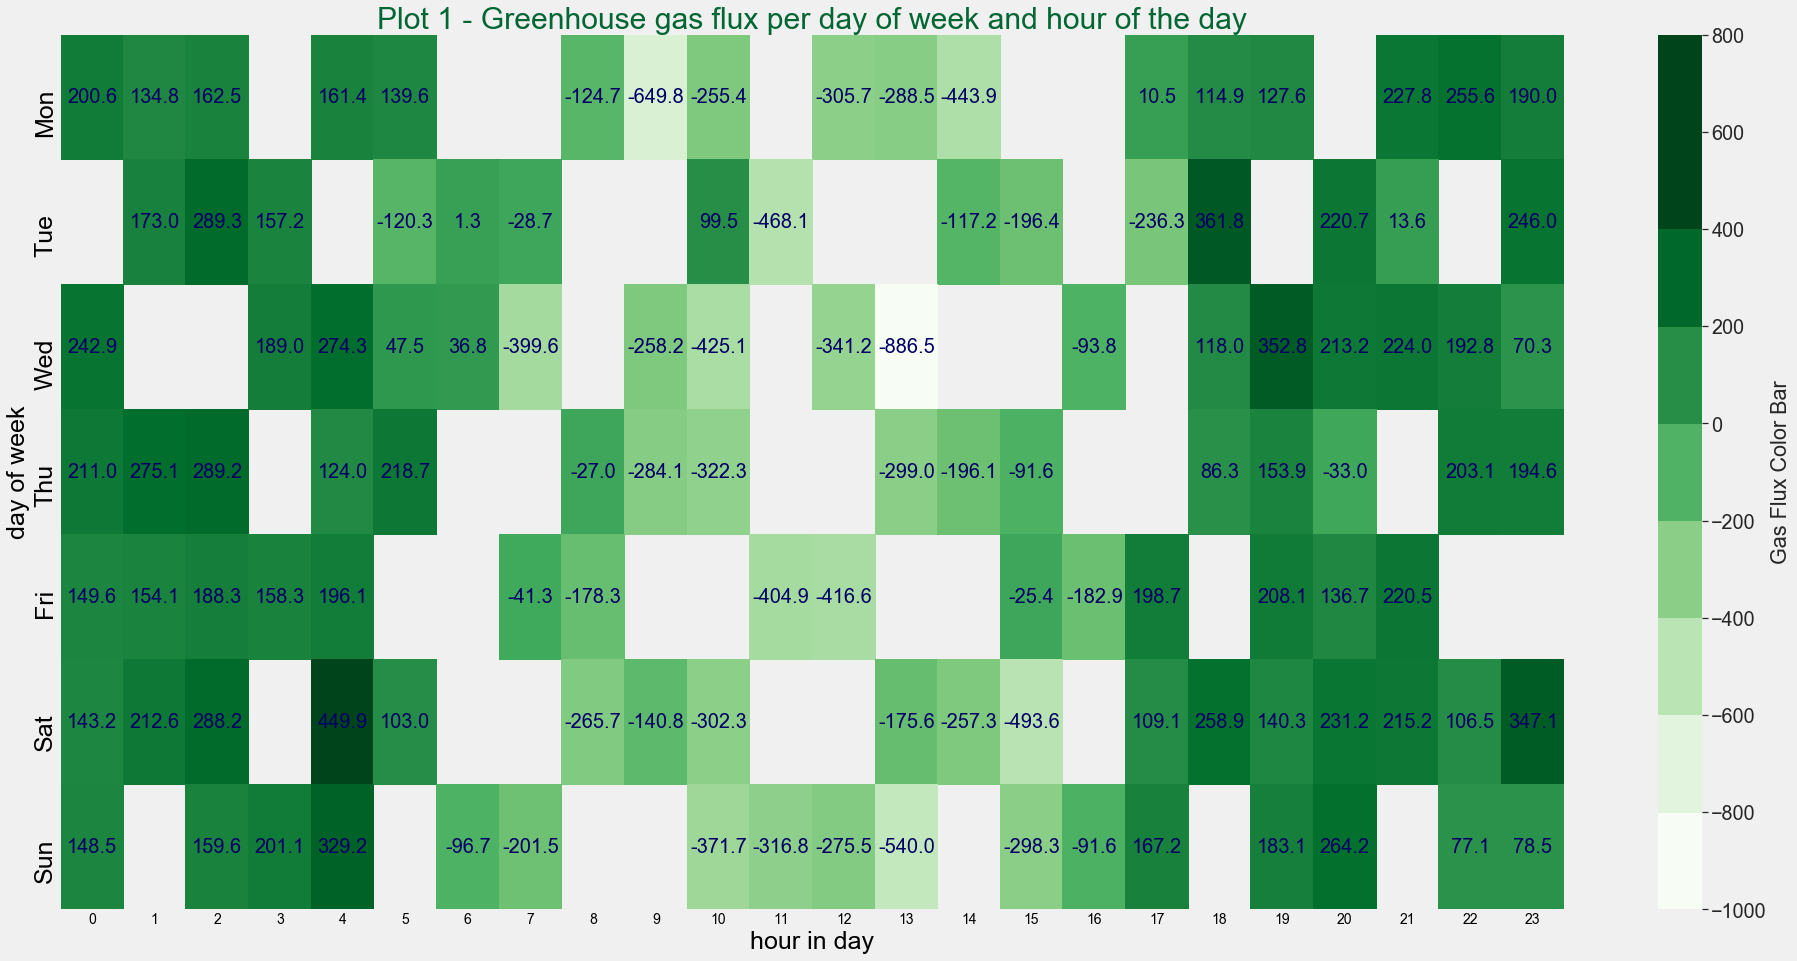

In [16]:
#Plot heat map for the dataframe hour_week : {DataTime, Flux, day of week, hour in day}

f, ax = plt.subplots(figsize=(30, 15))

sns.set(font_scale=1.8)

heat_map = sns.heatmap(hour_week1, ax=ax, cmap="Greens", annot=True, annot_kws={"size": 20, "color":'#000066'},
                       cbar_kws={'label': 'Gas Flux Color Bar', 'boundaries':np.arange(-1000,1000,200)},
                       fmt='.1f')

ax.set_title('Plot '+plotId+' - Greenhouse gas flux per day of week and hour of the day', fontsize=30, color='#006633')
ax.set_xlabel('hour in day', fontsize=25)
ax.set_ylabel('day of week', fontsize=25)

ax.set_yticklabels(day_abbr[0:7], fontsize=25)

#Save heatmap as a file
#output file name
output_file_name = "gasflux_Plot"+plotId+"_heatmap_mean_hourinday_dayofweek.png" 
plot_file_name = path_image + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()